<a href="https://colab.research.google.com/github/rbrazuna/hello-world/blob/main/Aula02_codigo_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aula 2: Código Python - Construindo a Primeira Rede Neural (MLP)

Este notebook acompanha a Aula 2 do curso Redes Neurais I.
Cobriremos:
1. Geração/Carregamento de Dados (Ex: make_moons)
2. Construção de um Modelo MLP simples com Keras
3. Compilação do Modelo
4. Treinamento do Modelo
5. Avaliação do Modelo
6. Visualização da Fronteira de Decisão

#Aula 2: Código - Construindo a Primeira Rede Neural (MLP)

 Nesta aula, vamos construir nossa primeira Rede Neural Multicamadas (MLP) usando Keras/TensorFlow para resolver um problema de classificação binária não linearmente separável.


In [1]:
!pip install tensorflow
!pip install keras

In [2]:
#importar bibliotecas
import numpy as np
from sklearn.datasets import make_moons #geração de dataset não linearmente separável
import tensorflow as tf # importação da biblioteca tensorflow
from keras.models import Sequential #importação para utilização de modelos sequenciais do keras
from keras.layers import Dense #importação de camadas densas no keras
import matplotlib.pyplot as plt #biblioteca de visualizção

from sklearn.model_selection import train_test_split #divisão de treino e teste
from sklearn.metrics import accuracy_score #avaliação do modelo

In [3]:
tf.__version__

'2.19.0'

# 2. Geração e Preparação dos Dados

 Usaremos a função `make_moons` do Scikit-learn para criar um dataset 2D com duas classes em formato de "luas", que não pode ser separado por uma linha reta.

In [4]:
# Gerar os dados
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

In [12]:
X.shape
print(y)

[1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1
 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1
 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1
 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0
 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1
 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1
 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1
 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0
 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1
 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1
 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1
 0 0 0 1 0 0 0 0 0 1 1 1 

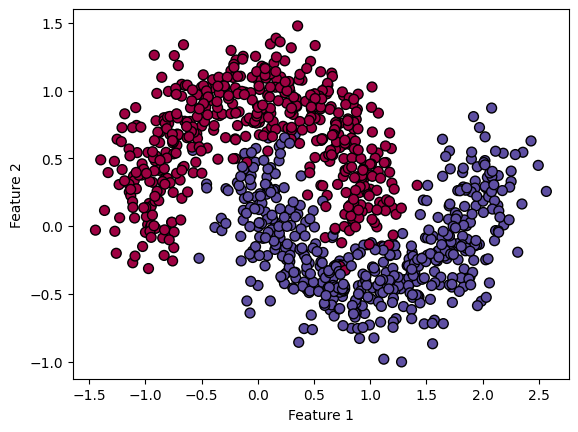

In [6]:
# Visualizar os dados
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s=50, edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

**Observação:** Veja como as duas classes (cores diferentes) estão entrelaçadas. Um modelo linear (como o Perceptron ou Regressão Logística) teria dificuldade aqui.

In [7]:
#Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Treino (features):', X_train.shape)
print('Teste (features):', X_test.shape)
print('Treino (classe):', y_train.shape)
print('Teste (classe):',y_test.shape)

Treino (features): (800, 2)
Teste (features): (200, 2)
Treino (classe): (800,)
Teste (classe): (200,)


# 3. Construção do Modelo MLP com Keras

 Vamos criar um modelo sequencial simples:
 *   Camada de Entrada: Implícita pela `input_shape` na primeira camada Densa.
 *   Camada Oculta: 4 neurônios com ativação ReLU.
 *   Camada de Saída: 1 neurônio com ativação Sigmoid (para classificação binária).


In [13]:
# Instanciar o modelo Sequencial
model = Sequential()

In [14]:
X.shape[1] # retorna o número de colunas (features) do seu dataset X.

2

In [ ]:
#Adicionar a primeira camada oculta (e definir a forma da entrada)
# units = número de neurônios na camada
# activation = função de ativação
# input_shape = formato de amostra de entrada (temos 2 features)


model.add(
    Dense(
        units = 4,
        activation='relu',
        input_shape=(X.shape[1],)
    )
)


In [ ]:
# Adicionar a camada de saída
model.add(
    Dense(
        units= 1,
        activation='sigmoid'
    )
)


In [ ]:
# Visualizar a arquitetura do modelo
model.summary()

**Análise do `summary`:**
 *   **Layer (type):** Tipo da camada.
 *   **Output Shape:** Formato da saída da camada. `(None, 4)` significa que para qualquer número de amostras (None), a saída terá 4 features (os 4 neurônios).
 *   **Param #:** Número de parâmetros treináveis na camada.
     *   `dense` (oculta): (2 entradas * 4 neurônios) + 4 biases = 8 + 4 = 12 parâmetros.
     *   `dense_1` (saída): (4 entradas da camada anterior * 1 neurônio) + 1 bias = 4 + 1 = 5 parâmetros.
     *   Total: 17 parâmetros a serem aprendidos!

# 4. Compilação do Modelo

# Antes de treinar, precisamos configurar o processo de aprendizado usando `compile()`:
 *   **`optimizer`:** Algoritmo para minimizar a função de perda (ex: \'adam\', \'sgd\'). Adam é um bom ponto de partida.
 *   **`loss`:** Função para medir o erro entre as previsões e os valores reais. Para classificação binária com saída Sigmoid, usamos \'binary_crossentropy\'.
 *   **`metrics`:** Lista de métricas para avaliar o modelo durante o treinamento e teste (ex: \'accuracy\').


In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])

# 5. Treinamento do Modelo

 Agora, alimentamos o modelo com os dados de treino usando `fit()`.
 *   **`X_train`, `y_train`:** Dados e labels de treino.
 *   **`epochs`:** Número de vezes que o modelo verá todo o dataset de treino.
 *   **`validation_data`:** Dados para avaliar o modelo ao final de cada época (não usados para treinar).
 *   **`verbose`:** Controla a quantidade de informação impressa durante o treino (1 = barra de progresso).


# 6. Avaliação do Modelo

 Avaliamos a performance final do modelo no conjunto de teste (dados que ele nunca viu durante o treino).


In [ ]:
#Avaliar no conjunto de teste


In [ ]:
# Fazer previsões no conjunto de teste



# 7. Visualização do Histórico e Fronteira de Decisão

 Plotar as curvas de aprendizado e a fronteira de decisão ajuda a entender melhor o treinamento e o que o modelo aprendeu.


In [ ]:
# Plotar histórico de loss e accuracy
mlp_dict = mlp.history

acc = mlp_dict['accuracy']
val_acc = mlp_dict['val_accuracy']
loss = mlp_dict['loss']
val_loss = mlp_dict['val_loss']

epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss, 'bo', label='Loss Treino')
plt.plot(epochs_range, val_loss, 'b', label='Loss Validação')
plt.title('Loss de Treino e Validação')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, acc, 'ro', label='Acc Treino')
plt.plot(epochs_range, val_acc, 'r', label='Acc Validação')
plt.title('Acurácia de Treino e Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Função para plotar a fronteira de decisão
def plot_fontreira_decisao(model, X, y):
    # Definir limites do gráfico e criar uma grade de pontos
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = 0.01 # tamanho do passo na grade
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Fazer previsões para cada ponto na grade
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = (Z > 0.5).astype(int) # Converter probabilidades para classes
    Z = Z.reshape(xx.shape)

    # Plotar o contorno (fronteira) e os dados
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s=50, edgecolors='k')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Fronteira de Decisão Aprendida pelo MLP")
    plt.show()

In [ ]:
# Plotar a fronteira de decisão para os dados de teste
plot_fontreira_decisao(model, X_test, y_test)